In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

In [10]:
band = 'C'
temp = 10
cant = 10

load_data = np.load(f'pytmatrix_out/brisbane_radarsim_{band}_{cant}deg_{temp}C.npz', allow_pickle=True)
bris_dict = {'dbz_array':load_data['dbz_array'], 'zdr_db_array':load_data['zdr_db_array'],
             'kdp_array':load_data['kdp_array'], 'att_array':load_data['att_array'], 'time_array':load_data['att_array'], 'rain_array':load_data['rain_array']}

load_data = np.load(f'pytmatrix_out/darwin_radarsim_{band}_{cant}deg_{temp}C.npz')
darw_dict = {'dbz_array':load_data['dbz_array'], 'zdr_db_array':load_data['zdr_db_array'],
             'kdp_array':load_data['kdp_array'], 'att_array':load_data['att_array'], 'time_array':load_data['att_array'], 'rain_array':load_data['rain_array']}

load_data = np.load(f'pytmatrix_out/broadmeadows_radarsim_{band}_{cant}deg_{temp}C.npz')
broad_dict = {'dbz_array':load_data['dbz_array'], 'zdr_db_array':load_data['zdr_db_array'],
             'kdp_array':load_data['kdp_array'], 'att_array':load_data['att_array'], 'time_array':load_data['att_array'], 'rain_array':load_data['rain_array']}

load_data = np.load(f'pytmatrix_out/mtview_radarsim_{band}_{cant}deg_{temp}C.npz')
mtview_dict = {'dbz_array':load_data['dbz_array'], 'zdr_db_array':load_data['zdr_db_array'],
             'kdp_array':load_data['kdp_array'], 'att_array':load_data['att_array'], 'time_array':load_data['att_array'], 'rain_array':load_data['rain_array']}

<ipython-input-11-379c3e39ebde>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(data_dict['att_array']), np.log(data_dict['rain_array']), 'b.', markersize=1)
<ipython-input-11-379c3e39ebde>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(data_dict['att_array']), np.log(data_dict['rain_array']), 'b.', markersize=1)
<ipython-input-11-379c3e39ebde>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(data_dict['att_array']), np.log(data_dict['rain_array']), 'b.', markersize=1)


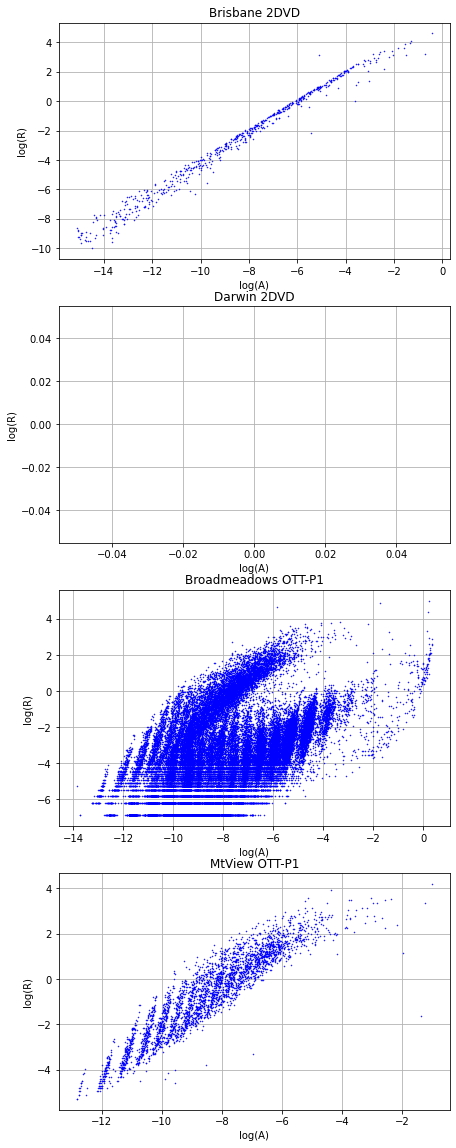

In [11]:
def r_kdp_plot(subplot_id, data_dict, title):
    ax = plt.subplot(subplot_id)
    plt.plot(np.log(data_dict['att_array']), np.log(data_dict['rain_array']), 'b.', markersize=1)
    #plt.xlim([-4,1])
    #plt.ylim([-1,3])
    plt.xlabel("log(A)")
    plt.ylabel("log(R)")
    plt.title(title)
    plt.grid()

fig = plt.figure(figsize=(7,20))
r_kdp_plot(411, bris_dict, 'Brisbane 2DVD')
r_kdp_plot(412, darw_dict, 'Darwin 2DVD')
r_kdp_plot(413, broad_dict, 'Broadmeadows OTT-P1')
r_kdp_plot(414, mtview_dict, 'MtView OTT-P1')

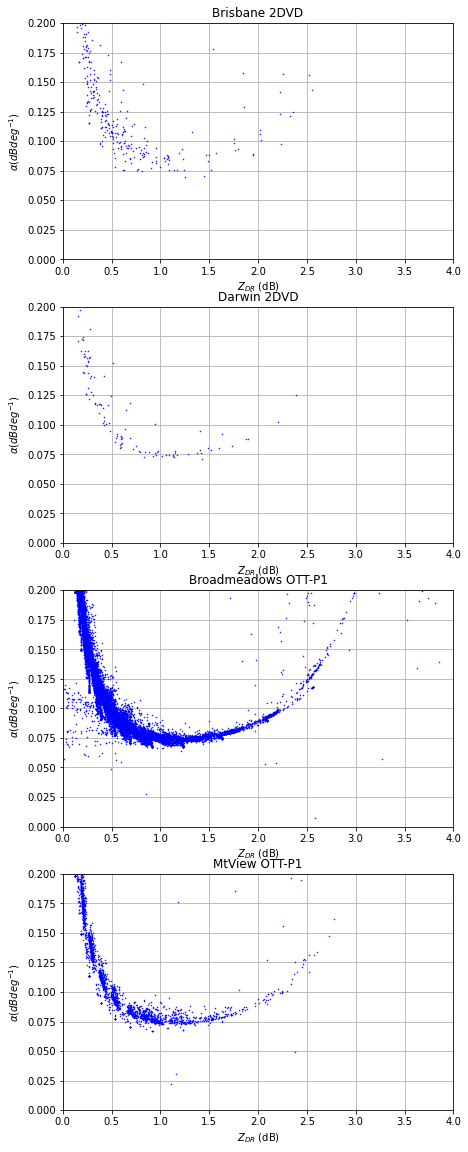

In [12]:
def zdr_alpha_plot(subplot_id, data_dict, title):
    ax = plt.subplot(subplot_id)
    plt.plot(data_dict['zdr_db_array'], data_dict['att_array']/data_dict['kdp_array'], 'b.', markersize=1)
    plt.xlim([0,4])
    plt.ylim([0,0.2])
    plt.xlabel("$Z_{DR}$ (dB)")
    plt.ylabel(r"$ \alpha (dB deg^{-1})$")
    plt.title(title)
    plt.grid()

fig = plt.figure(figsize=(7,20))
zdr_alpha_plot(411, bris_dict, 'Brisbane 2DVD')
zdr_alpha_plot(412, darw_dict, 'Darwin 2DVD')
zdr_alpha_plot(413, broad_dict, 'Broadmeadows OTT-P1')
zdr_alpha_plot(414, mtview_dict, 'MtView OTT-P1')


No handles with labels found to put in legend.
<ipython-input-13-7bf596d1fce6>:9: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) - c
/g/data/en0/jss548/miniconda3/envs/radar-dev/lib/python3.8/site-packages/scipy/optimize/minpack.py:766: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
/g/data/en0/jss548/miniconda3/envs/radar-dev/lib/python3.8/site-packages/scipy/optimize/minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


(0.0, 0.2)

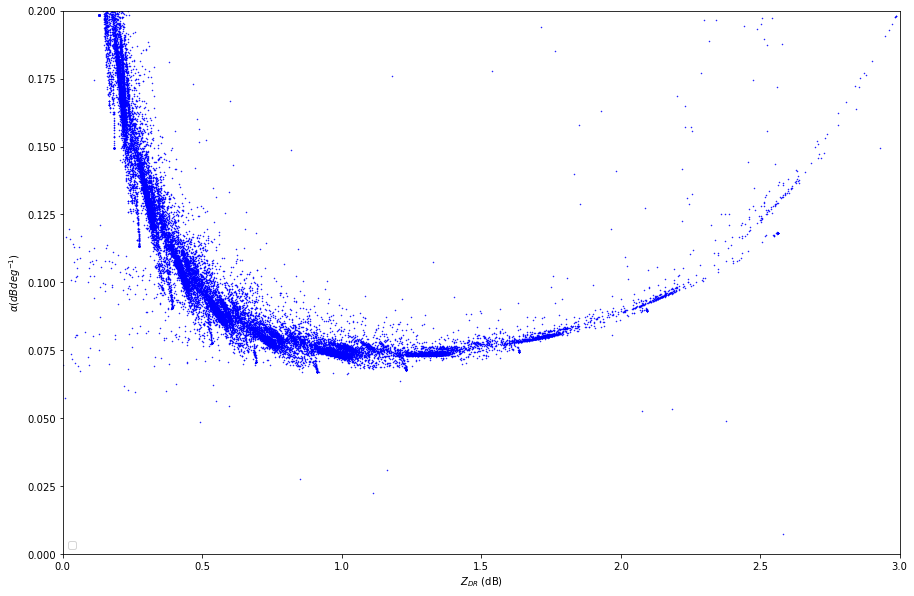

In [13]:
def fit_zdr_alpha(data_dict, line_style, legend_name):
    
    #extra arrays from dict
    zdr_array = data_dict['zdr_db_array']
    alpha_array = data_dict['att_array']/data_dict['kdp_array']
    
    #nonlinear fitting for alpha-zdr/z slope
    def func(x, a, b, c):
        return a * np.exp(-b * x) - c
    popt, pcov = curve_fit(func, zdr_array, alpha_array, p0=(1, 50, 0))
    dummy_x = np.linspace(0,4.0,100)

    plt.plot(zdr_array, alpha_array, 'b.', markersize=1)
    
    #plt.plot(dummy_x, func(dummy_x, *popt), line_style, label = legend_name + ' fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    plt.xlabel("$Z_{DR}$ (dB)")
    plt.ylabel(r"$ \alpha (dB deg^{-1})$")
    plt.grid()
    plt.legend()
    
plt.figure(figsize=(15,10))
fit_zdr_alpha(mtview_dict, '-k', 'MtView')
fit_zdr_alpha(broad_dict, '-g', 'Broadmeadows')
fit_zdr_alpha(darw_dict, '-r', 'Darwin')
fit_zdr_alpha(bris_dict, '-b', 'Brisbane')
plt.xlim([0,3])
plt.ylim([0,0.2])

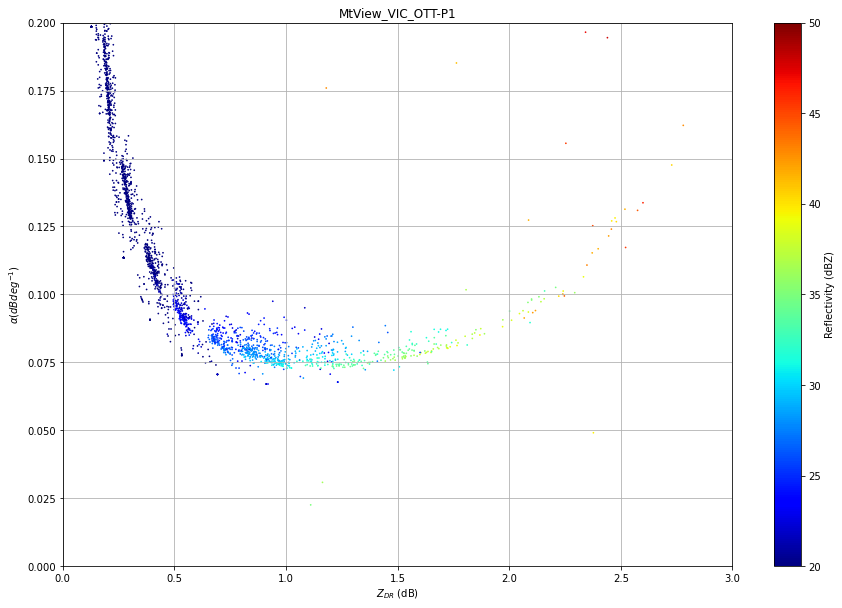

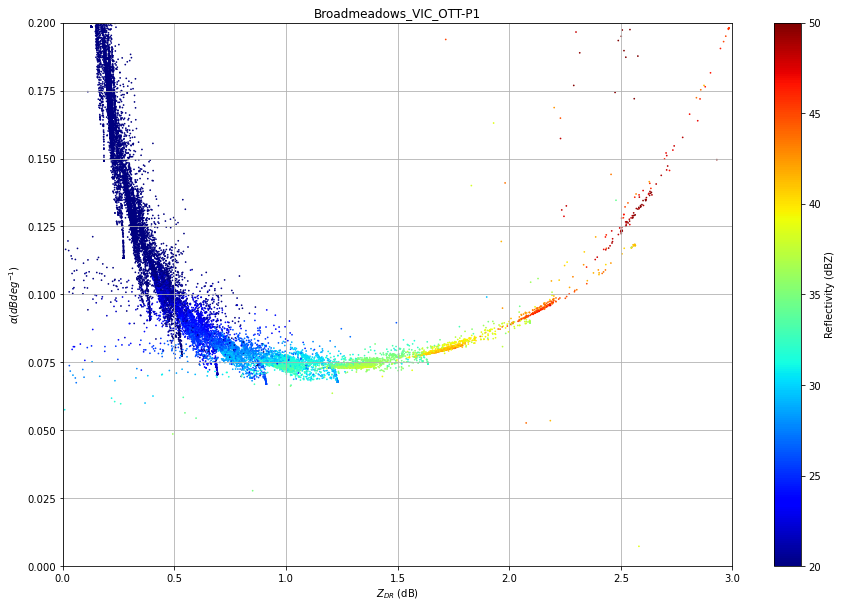

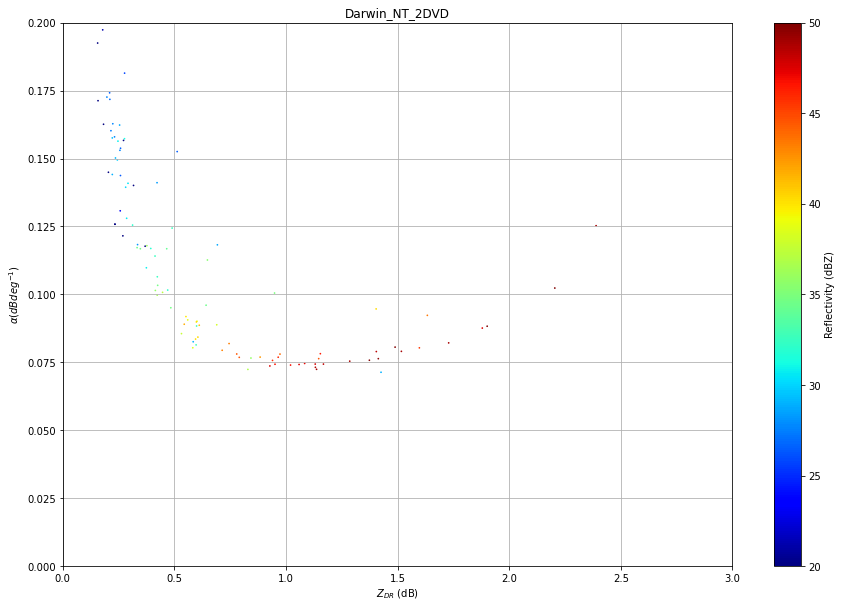

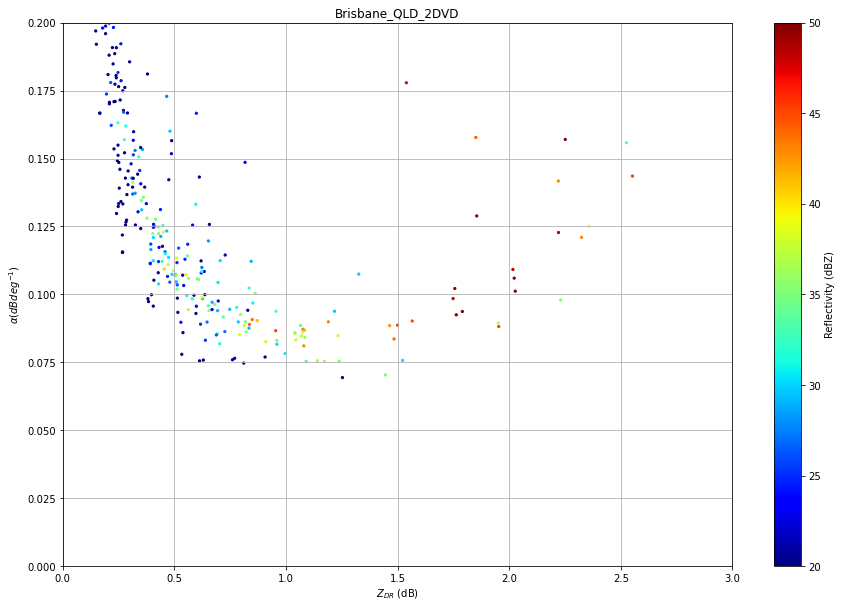

In [14]:
def zdr_alpha_test1(data_dict, title_name, ms):
    
    plt.figure(figsize=(15,10))
    
    #extra arrays from dict
    zdr_array   = data_dict['zdr_db_array']
    alpha_array = data_dict['att_array']/data_dict['kdp_array']
    dbz_array   = data_dict['dbz_array']
    
    plt.scatter(zdr_array, alpha_array, s=ms, c=dbz_array, cmap='jet', marker='.',vmin=20, vmax=50)
    cbar = plt.colorbar()
    cbar.set_label('Reflectivity (dBZ)')
    plt.xlabel("$Z_{DR}$ (dB)")
    plt.ylabel(r"$ \alpha (dB deg^{-1})$")
    plt.title(title_name)
    plt.grid()
    plt.xlim([0,3])
    plt.ylim([0,0.2])
    
    plt.savefig('img/'  + title_name + '_test1.png')

zdr_alpha_test1(mtview_dict, 'MtView_VIC_OTT-P1', 2)
zdr_alpha_test1(broad_dict, 'Broadmeadows_VIC_OTT-P1', 2)
zdr_alpha_test1(darw_dict, 'Darwin_NT_2DVD', 2)
zdr_alpha_test1(bris_dict, 'Brisbane_QLD_2DVD', 20)


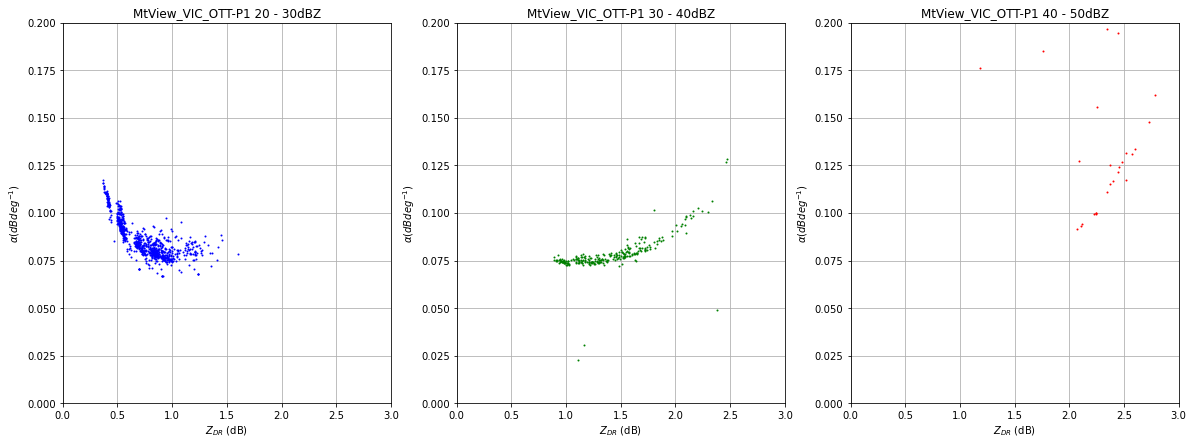

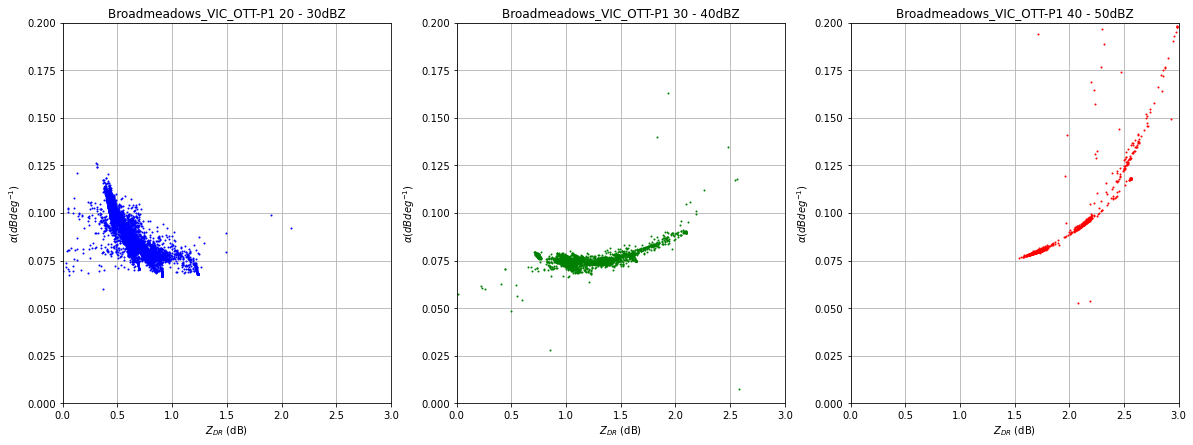

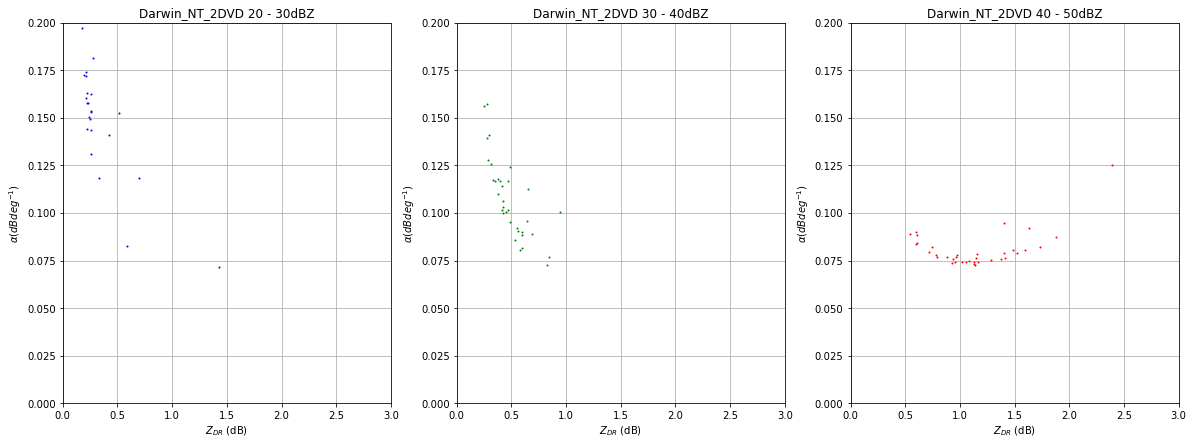

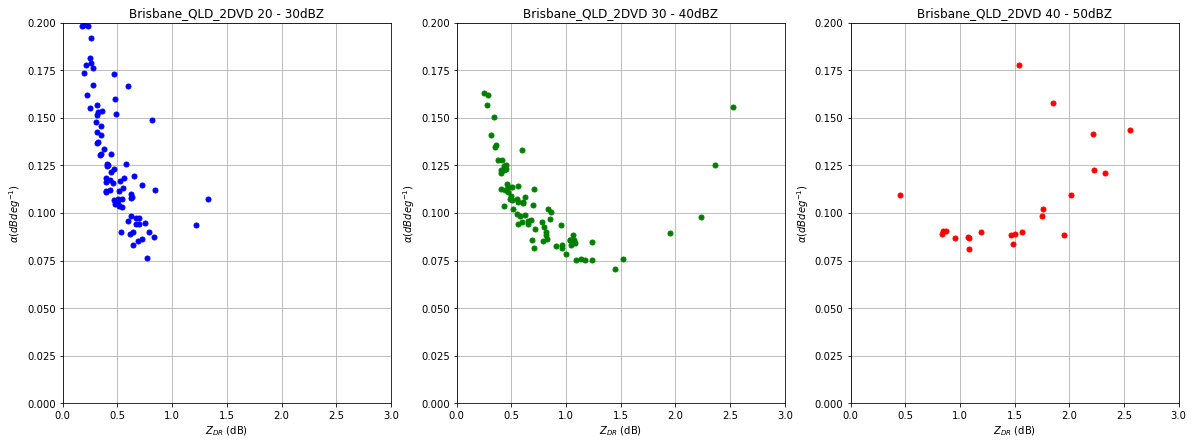

In [15]:
def zdr_alpha_test2(data_dict, title_name, ms):
    
    plt.figure(figsize=(20,7))
    
    #extra arrays from dict
    zdr_array   = data_dict['zdr_db_array']
    alpha_array = data_dict['att_array']/data_dict['kdp_array']
    dbz_array   = data_dict['dbz_array']
    
    #masks
    mask1 = np.logical_and(dbz_array>=20, dbz_array<30)
    mask2 = np.logical_and(dbz_array>=30, dbz_array<40)
    mask3 = np.logical_and(dbz_array>=40, dbz_array<50)
    
    #plotting
    plt.subplot(131)
    plt.plot(zdr_array[mask1], alpha_array[mask1], 'b.', markersize=ms)
    plt.xlabel("$Z_{DR}$ (dB)")
    plt.ylabel(r"$ \alpha (dB deg^{-1})$")
    plt.title(title_name + ' 20 - 30dBZ')
    plt.grid()
    plt.xlim([0,3])
    plt.ylim([0,0.2])
    
    plt.subplot(132)
    plt.plot(zdr_array[mask2], alpha_array[mask2], 'g.', markersize=ms)
    plt.xlabel("$Z_{DR}$ (dB)")
    plt.ylabel(r"$ \alpha (dB deg^{-1})$")
    plt.title(title_name + ' 30 - 40dBZ')
    plt.grid()
    plt.xlim([0,3])
    plt.ylim([0,0.2])
    
    plt.subplot(133)
    plt.plot(zdr_array[mask3], alpha_array[mask3], 'r.', markersize=ms)
    plt.xlabel("$Z_{DR}$ (dB)")
    plt.ylabel(r"$ \alpha (dB deg^{-1})$")
    plt.title(title_name + ' 40 - 50dBZ')
    plt.grid()
    plt.xlim([0,3])
    plt.ylim([0,0.2])   
    
    plt.savefig('img/'  + title_name + '_test2.png')

zdr_alpha_test2(mtview_dict, 'MtView_VIC_OTT-P1', 2)
zdr_alpha_test2(broad_dict, 'Broadmeadows_VIC_OTT-P1', 2)
zdr_alpha_test2(darw_dict, 'Darwin_NT_2DVD', 2)
zdr_alpha_test2(bris_dict, 'Brisbane_QLD_2DVD' , 10)

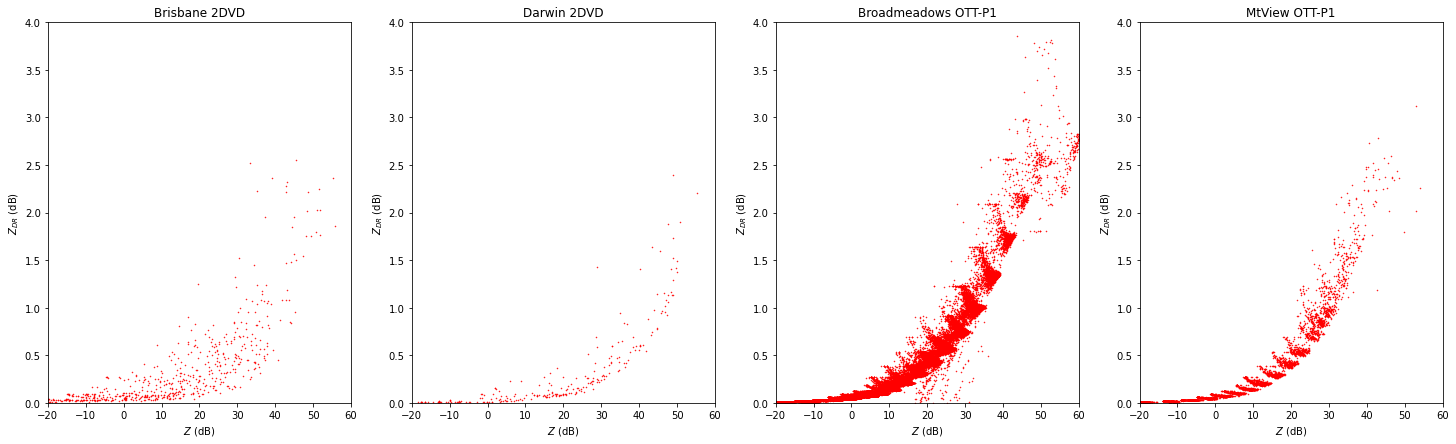

In [16]:
def zdr_z_plot(subplot_id, data_dict, title):
    ax = plt.subplot(subplot_id)
    plt.plot(data_dict['dbz_array'], data_dict['zdr_db_array'], 'r.', markersize=1)
    plt.xlim([-20, 60])
    plt.ylim([0, 4.0])
    plt.ylabel("$Z_{DR}$ (dB)")
    plt.xlabel("$Z$ (dB)")
    plt.title(title)

fig = plt.figure(figsize=(25,7))
zdr_z_plot(141, bris_dict, 'Brisbane 2DVD')
zdr_z_plot(142, darw_dict, 'Darwin 2DVD')
zdr_z_plot(143, broad_dict, 'Broadmeadows OTT-P1')
zdr_z_plot(144, mtview_dict, 'MtView OTT-P1')


linear model  
-6.063 x + 0.2206 change x 0.035 constant model y 0.08040523270650574


/g/data/en0/jss548/miniconda3/envs/radar-dev/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/g/data/en0/jss548/miniconda3/envs/radar-dev/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


'\nBy the way I realized something else that implies the percentile technique may not reflect reality.\nIt is assumed that if you take a true Z-ZDR relation ship for a given storm, it will behave like \nthat (all bits of the relationship belong to the same percentile, I don\';t see how that is actually true. \nThat is why I am so keen on splitting in at least three Z ranges. We can actually show that later.\nKeep you five Z-Zdr relationships for Dariwn, then plot many individual Z-Zdr fits, I am pretty sure \nthat some of them will "cross" percentiles. I need to make notes of all this before I forget (getting old = take more notes ...)\n'

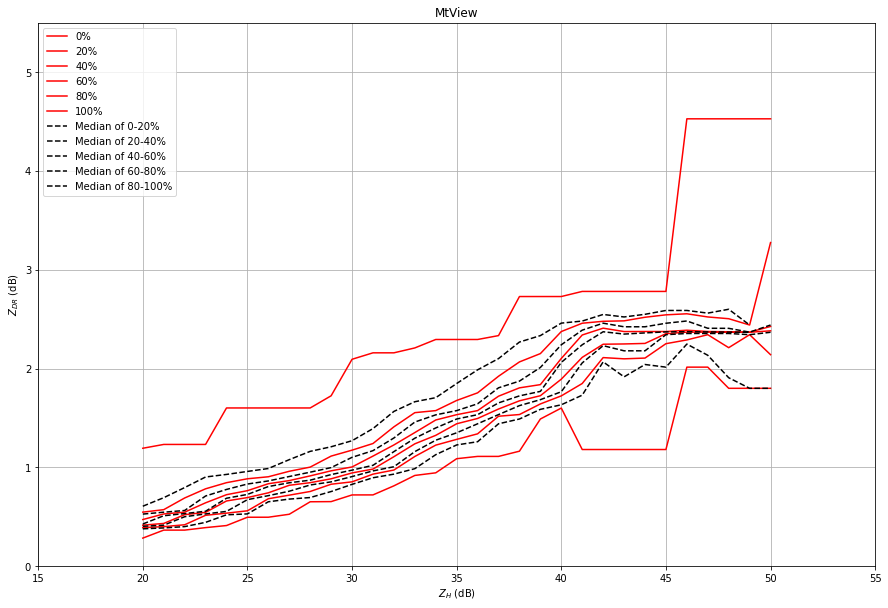

In [ ]:
def dsd_nws(data_dict, dataset_name, zdrpct_bin_width, dbz_bin_width, dbz_bin_spacing):
    
    #extra arrays from dict
    dbz_array = data_dict['dbz_array']
    zdr_array = data_dict['zdr_db_array']
    kdp_array = data_dict['kdp_array']
    att_array = data_dict['att_array']
    
    #dzdr/dz slope calculation limits
    slope_z_min = 20
    slope_z_max = 40
    
    #set reflectivity bins
    min_dbz = 20
    max_dbz = 50
    dbz_bin_centres = np.arange(min_dbz, max_dbz+1, dbz_bin_spacing)
    #print(dbz_bin_centres)
    #set percentile bins
    zdrpct_bin = np.arange(zdrpct_bin_width, 100, zdrpct_bin_width)
    zdrpct_edges = np.append(np.append([0], zdrpct_bin), [100])
    n_zdrpct_bins  = len(zdrpct_bin) + 1
    n_zdrpct_edges = len(zdrpct_edges)
    #allocate zdr array
    zdrpct_median_array = np.zeros((len(dbz_bin_centres), n_zdrpct_bins))
    zdrpct_attsum_array = np.zeros((len(dbz_bin_centres), n_zdrpct_bins))
    zdrpct_kdpsum_array = np.zeros((len(dbz_bin_centres), n_zdrpct_bins))
    zdrpct_edge_array   = np.zeros((len(dbz_bin_centres), n_zdrpct_edges))
    
    #core analysis
    for i, dbz_centre in enumerate(dbz_bin_centres):
        #extract subset for dbz bin
        dbz_bin_lower = dbz_centre - dbz_bin_width/2
        dbz_bin_upper = dbz_centre + dbz_bin_width/2
        #create dbz subset mask
        dbz_subset_mask = np.logical_and(dbz_array >= dbz_bin_lower, dbz_array < dbz_bin_upper)
        #subset
        zdr_subset = zdr_array[dbz_subset_mask]
        att_subset = att_array[dbz_subset_mask]
        kdp_subset = kdp_array[dbz_subset_mask]
        #calculate percentiles
        zdr_subset_min = np.min(zdr_subset)
        zdr_subset_max = np.max(zdr_subset)
        zdr_bin_edges = np.percentile(zdr_subset, zdrpct_bin)
        zdr_bin_edges = np.append(np.append([zdr_subset_min], zdr_bin_edges), [zdr_subset_max])
        #allocate zdr percentile values to array for plotting later
        zdrpct_edge_array[i,:] = zdr_bin_edges
        #calculate median between each percentile value and store for plotting.
        #also calculate the sums of att and kdp within each percentile for the Z bin
        for j in range(0, n_zdrpct_bins):
            zdr_subset_mask = np.logical_and(zdr_subset>=zdr_bin_edges[j], zdr_subset<zdr_bin_edges[j+1])
            zdrpct_median_array[i,j] = np.median(zdr_subset[zdr_subset_mask])
            zdrpct_attsum_array[i,j] = np.nansum(att_subset[zdr_subset_mask])
            zdrpct_kdpsum_array[i,j] = np.nansum(kdp_subset[zdr_subset_mask])
    
    #calculate dZDR/dZ for zdrpct
    alpha_array = np.zeros(n_zdrpct_bins)
    slope_array = np.zeros(n_zdrpct_bins)

    for i in range(0, n_zdrpct_bins):
        #find matching samples
        slope_idx = np.where(np.logical_and(dbz_bin_centres>=slope_z_min, dbz_bin_centres<=slope_z_max))[0]
        #calculate alpha for dbz bin
        alpha_array[i] = np.sum(zdrpct_attsum_array[slope_idx,i])/np.sum(zdrpct_kdpsum_array[slope_idx,i])
        #calculate dzdr/dz for dbz bin
        upper_zdr = np.nan
        upper_idx = -1
        while np.isnan(upper_zdr):
            upper_zdr = zdrpct_median_array[slope_idx[upper_idx],i]
            upper_idx = upper_idx - 1
            new_slope_z_max = dbz_bin_centres[upper_idx]
            #print(new_slope_z_max)
        lower_zdr = zdrpct_median_array[slope_idx[0],i]
        slope_array[i] = (upper_zdr - lower_zdr)/(new_slope_z_max-slope_z_min)
            
    #plotting
    plt.figure(figsize=(15,10))
    #plot edges
    for i in range(0, n_zdrpct_edges):
        plt.plot(dbz_bin_centres, zdrpct_edge_array[:,i],'r-',label=str(zdrpct_edges[i])+'%')
    #plot medians
    for i in range(0, n_zdrpct_bins):
        plt.plot(dbz_bin_centres, zdrpct_median_array[:,i],'k--',label='Median of ' + str(zdrpct_edges[i]) + '-' + str(zdrpct_edges[i+1]) + '%')
    #define figure    
    plt.xlim([15,55])
    plt.ylim([0,5.5])       
    plt.xlabel("$Z_{H}$ (dB)")
    plt.ylabel("$Z_{DR}$ (dB)")
    plt.title(dataset_name)
    plt.legend()
    plt.grid()
    
    return [slope_array, alpha_array]

def plt_estimator(data, marker_style, line_style, color, legend_name):
    
    #unpack data
    slope_data = data[0]
    alpha_data = data[1]

    #nonlinear fitting for alpha-zdr/z slope
    def func(x, a, b, c):
        return a * np.exp(-b * x) - c

    #plotting
    plt.plot(slope_data, alpha_data, color = color, marker=marker_style, lw=0,
            label = legend_name)
#     try:
#         popt, pcov = curve_fit(func, slope_data, alpha_data, [1.2, 300, 0])
# #             dummy_x = np.linspace(0,0.08,100)
# #             plt.plot(dummy_x, func(dummy_x, *popt), color = color, ls = line_style,
# #                      label = str(dbz_bins[i]) + 'dBZ ' + legend_name + ' fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
#     except:
#         print('slope fitting failed')
        
    plt.xlabel("$\Delta Z_{DR}/\Delta Z$ ")
    plt.ylabel(r"$ \alpha (dB deg^{-1})$")
    plt.grid()
    plt.legend()
    plt.xlim([0, 0.1])
    plt.ylim([0, 0.2])
    
def fit_estimator_quadatic(dsd_list):

    #maybe try hyerbolic orbital curve: (1 / (a * x) ** 2 - 1 / (a * x) + b)
    
    slope_data = []
    alpha_data = []
    #extract all dsd datasets
    for item in dsd_list:
        slope_data = np.append(slope_data, item[0])
        alpha_data = np.append(alpha_data, item[1])
    
    
    
    mymodel = np.poly1d(np.polyfit(slope_data, alpha_data, 2))
    myline = np.linspace(0,0.2,100)
    
    plt.plot(myline, mymodel(myline), 'r', label='quadratic')
    #print('quadratic model', mymodel)
    
def fit_estimator_bilinear(dsd_list):
    
    cutoff = 0.035
    slope_data = []
    alpha_data = []
    #extract all dsd datasets
    for item in dsd_list:
        slope_data = np.append(slope_data, item[0])
        alpha_data = np.append(alpha_data, item[1])
    
    #fit linear model below cutoff
    myfit_part1   = np.polyfit(slope_data[slope_data<cutoff], alpha_data[slope_data<cutoff], 1)
    mymodel_part1 = np.poly1d(myfit_part1)
    #fit y intercept above cutoff
    myfit_part2   = np.polyfit(slope_data[slope_data>=cutoff], alpha_data[slope_data>=cutoff], 0)
    mymodel_part2 = np.poly1d(myfit_part2)
    
    #find intercept of model 1 and model 2
    m1 = myfit_part1[0]
    c1 = myfit_part1[1]
    m2 = 0
    c2 = myfit_part2[0]
    model_change_x = (c1-c2) / (m2-m1)
    model_change_y = m1 * model_change_x + c1
    
    #plotting
    plot_x = np.linspace(0,0.2,100)
    plot_y = np.zeros_like(plot_x) + model_change_y
    plot_y[plot_x<model_change_x] = mymodel_part1(plot_x[plot_x<model_change_x])
    plt.plot(plot_x, plot_y, 'b', label='bilinear')
    print('linear model', mymodel_part1, 'change x', cutoff, 'constant model y', model_change_y)
    
    #save
    np.savez(f'alpha_fits/alphafit_{band}_{cant}deg_{temp}C.npz', myfit_part1=myfit_part1, myfit_part2=myfit_part2)
    
mtview_dsd = dsd_nws(mtview_dict, 'MtView',20, 5, 1)
broad_dsd = dsd_nws(broad_dict, 'Broadmeadows',20, 5, 1)
darw_dsd = dsd_nws(darw_dict, 'Darwin',20, 5, 1)
bris_dsd = dsd_nws(bris_dict, 'Brisbane',20, 10, 1)

plt.figure(figsize=(15,10))
plt_estimator(mtview_dsd, 'o','-', 'r', 'MtView')
plt_estimator(broad_dsd, '^', '--', 'b', 'Broadmeadows')
plt_estimator(darw_dsd, '*', ':', 'm', 'Darwin')
plt_estimator(bris_dsd, 's', '-.', 'g', 'Brisbane')

fit_estimator_quadatic([mtview_dsd, broad_dsd, darw_dsd, bris_dsd])
fit_estimator_bilinear([mtview_dsd, broad_dsd, darw_dsd, bris_dsd])
plt.title(f'Temperature {temp}C at {band} band')
plt.grid()
plt.legend()

# #plot NWS fit
# fit_x = np.linspace(0,0.2,100)
# fit_y = np.zeros_like(fit_x) + 0.06
# fit_y[fit_x<0.045] = 0.049-0.75*fit_x[fit_x<0.045]
# plt.plot(fit_x, fit_y, color = 'k', ls = '-',
#         label = 'NWS Fit') 

"""
Actually not for each percentile. You still do the percentile thing but you do the 
percentile analysis separately for the [20,30] Z range, [30,40], [40,50]. Then you 
estimate 5 slopes for each Z range using the percentile approach and fir example 
in the first Z range you calculate the slope using medianZDR(30)-medianZDR(20 / 10,
then you repeat the same for the two other Z ranges. In the end you have three alpha - slope curves.
Then when you have observations, you know Z, and you can calculate the slope from the Z-ZDR 
scatterplot using the Z range in which Z belongs, then use the slope - alpha relationship for
this Z range to get alpha. With this you get a map of alpha ! I so understand this clearly now, 
it is almost painful . Wait, I also understand why he uses 2 dB bins now, that's for the
calculations of median ZDR !) you want to do it for a bin as small as possible and you need
to be careful that the bins are centered on the 20, 30, 40 and 50 values, that's why he takes 39-41 etc ...
"""

"""
By the way I realized something else that implies the percentile technique may not reflect reality.
It is assumed that if you take a true Z-ZDR relation ship for a given storm, it will behave like 
that (all bits of the relationship belong to the same percentile, I don';t see how that is actually true. 
That is why I am so keen on splitting in at least three Z ranges. We can actually show that later.
Keep you five Z-Zdr relationships for Dariwn, then plot many individual Z-Zdr fits, I am pretty sure 
that some of them will "cross" percentiles. I need to make notes of all this before I forget (getting old = take more notes ...)
"""
